# Machine Learning Advanced Nanodegree
## Capstone Project
## Appliance Energy Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing, model_selection, metrics
#import lightgbm as lgb

%matplotlib inline

seed=79

from scipy.stats import spearmanr

## Reading data

In [2]:
data = pd.read_csv('energydata_complete.csv')
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [3]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Exploratory Analysis

In [4]:
print("Number of rows = {}".format(data.shape[0]))
print("Number of columns = {}".format(data.columns.shape[0]))

Number of rows = 19735
Number of columns = 29


In [5]:
print("Column wise count of null values:-")
print(data.isnull().sum())

Column wise count of null values:-
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


### So there are no null values in any of the columns. Now, dividing the columns according to the type of data:

In [6]:
#temperature columns
temp_cols = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

#humidity sensor columns
rho_cols = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

#weather data
weather_cols = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 

randoms = ["rv1", "rv2"]

target = ["Appliances"]

### the variables 'Date', 'lights' don't matter 
### The problem is regression not time series so Date doesn't matter
### lights doesn't matter as we have to predict total energy not category wise energy

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.25,random_state=seed)

In [8]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,97.875144,3.853118,21.691343,40.267556,20.344518,40.434363,22.278802,39.243995,20.860393,39.043799,...,19.493479,41.556594,7.421836,755.480135,79.824197,4.029001,38.290284,3.782509,24.893132,24.893132
std,102.314986,7.962567,1.615790,3.974692,2.202481,4.052420,2.012934,3.245701,2.048076,4.333479,...,2.022560,4.161295,5.343737,7.389218,14.901776,2.448171,11.789650,4.194994,14.539772,14.539772
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.596667,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.760000,37.363333,18.790000,37.900000,20.790000,36.900000,19.533333,35.560000,...,18.000000,38.530000,3.666667,750.900000,70.500000,2.000000,29.000000,0.933333,12.352580,12.352580
50%,60.000000,0.000000,21.600000,39.693333,20.000000,40.500000,22.100000,38.560000,20.666667,38.433333,...,19.390000,40.900000,6.933333,756.000000,83.833333,3.666667,40.000000,3.483333,24.878409,24.878409
75%,100.000000,0.000000,22.633333,43.066667,21.500000,43.273453,23.340000,41.730000,22.100000,42.200000,...,20.600000,44.326667,10.433333,760.833333,91.666667,5.500000,40.000000,6.600000,37.534894,37.534894
max,1080.000000,60.000000,26.260000,63.360000,29.856667,54.766667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.316667,49.996530,49.996530


In [9]:
test.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,...,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000
mean,97.154439,3.648156,21.672257,40.236290,20.331323,40.378596,22.234041,39.238015,20.840160,38.976220,...,19.462877,41.539823,7.381154,755.649993,79.529097,4.072001,38.452473,3.695305,25.272720,25.272720
std,103.160524,7.854510,1.576610,3.993397,2.164393,4.121677,1.985326,3.281383,2.027363,4.364807,...,1.991014,4.122361,5.238054,7.429316,14.898340,2.460314,11.810271,4.193354,14.364154,14.364154
min,10.000000,0.000000,16.823333,27.233333,16.100000,20.463333,17.200000,30.563333,15.100000,28.135714,...,14.890000,29.166667,-4.944444,729.433333,25.500000,0.000000,1.000000,-6.450000,0.005322,0.005322
25%,50.000000,0.000000,20.730000,37.290000,18.856667,37.860833,20.790000,36.863333,19.500000,35.466667,...,18.005000,38.500000,3.666667,751.000000,70.000000,2.000000,29.000000,0.850000,12.887871,12.887871
50%,60.000000,0.000000,21.600000,39.565000,19.933571,40.421667,22.100000,38.500000,20.600000,38.313333,...,19.390000,40.817500,6.900000,756.200000,83.500000,3.666667,40.000000,3.366667,25.066420,25.066420
75%,100.000000,0.000000,22.600000,43.090000,21.500000,43.228929,23.290000,41.790000,22.100000,42.090000,...,20.533333,44.362500,10.345833,761.191667,91.166667,5.666667,40.000000,6.400000,37.771965,37.771965
max,1070.000000,70.000000,26.166667,57.496667,29.856667,56.026667,28.956000,49.800000,26.142857,50.860000,...,24.500000,53.090000,25.816667,772.266667,100.000000,13.000000,65.000000,15.500000,49.981667,49.981667


In [10]:
input_vars = train[temp_cols+rho_cols+weather_cols+randoms]
output_var = train[target]

In [11]:
input_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.691343,20.344518,22.278802,20.860393,19.604773,7.923216,20.273236,22.028122,19.493479,40.267556,...,42.948244,41.556594,7.421836,3.782509,79.824197,755.480135,4.029001,38.290284,24.893132,24.893132
std,1.615790,2.202481,2.012934,2.048076,1.849641,6.117495,2.118416,1.960985,2.022560,3.974692,...,5.210450,4.161295,5.343737,4.194994,14.901776,7.389218,2.448171,11.789650,14.539772,14.539772
min,16.790000,16.100000,17.200000,15.100000,15.340000,-6.065000,15.390000,16.306667,14.890000,27.023333,...,29.600000,29.166667,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000,0.006033,0.006033
25%,20.760000,18.790000,20.790000,19.533333,18.290000,3.626667,18.700000,20.790000,18.000000,37.363333,...,39.096667,38.530000,3.666667,0.933333,70.500000,750.900000,2.000000,29.000000,12.352580,12.352580
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.075000,22.111111,19.390000,39.693333,...,42.390000,40.900000,6.933333,3.483333,83.833333,756.000000,3.666667,40.000000,24.878409,24.878409
75%,22.633333,21.500000,23.340000,22.100000,20.653889,11.226667,21.600000,23.390000,20.600000,43.066667,...,46.500000,44.326667,10.433333,6.600000,91.666667,760.833333,5.500000,40.000000,37.534894,37.534894
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,63.360000,...,58.780000,53.326667,26.100000,15.316667,100.000000,772.300000,14.000000,66.000000,49.996530,49.996530


In [12]:
output_var.describe()

,Appliances
count,14801.000000
mean,97.875144
std,102.314986
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


### Observations

* Temperature ranges for all home sensors is between 14.89℃ to 29.86℃ except for T6 for which it is -6.06℃ to 28.29℃. The reason for such low readings is that the sensor is kept outside.
* Similarly, humudity ranges for all home sensors is between 20.60`%` to 63.36%. Except for RH_5 and RH_6, whose ranges are 29.82`%` to 96.32`%` and 1`%` to 99.9`%` respectively.
    * The reason behind this is that RH_5 is inside the bathroom,
    * And RH_6 is outside the building, explaining the high humidity values.
* One interesting observation can be seen in `Appliances` column that although the max consumption is 1080`Wh`, 75`%` of values are less than 100`Wh`. This shows that there are fewer cases when Appliance energy consumption is very high.

### VISUAL INPUT VARS ANALYSIS

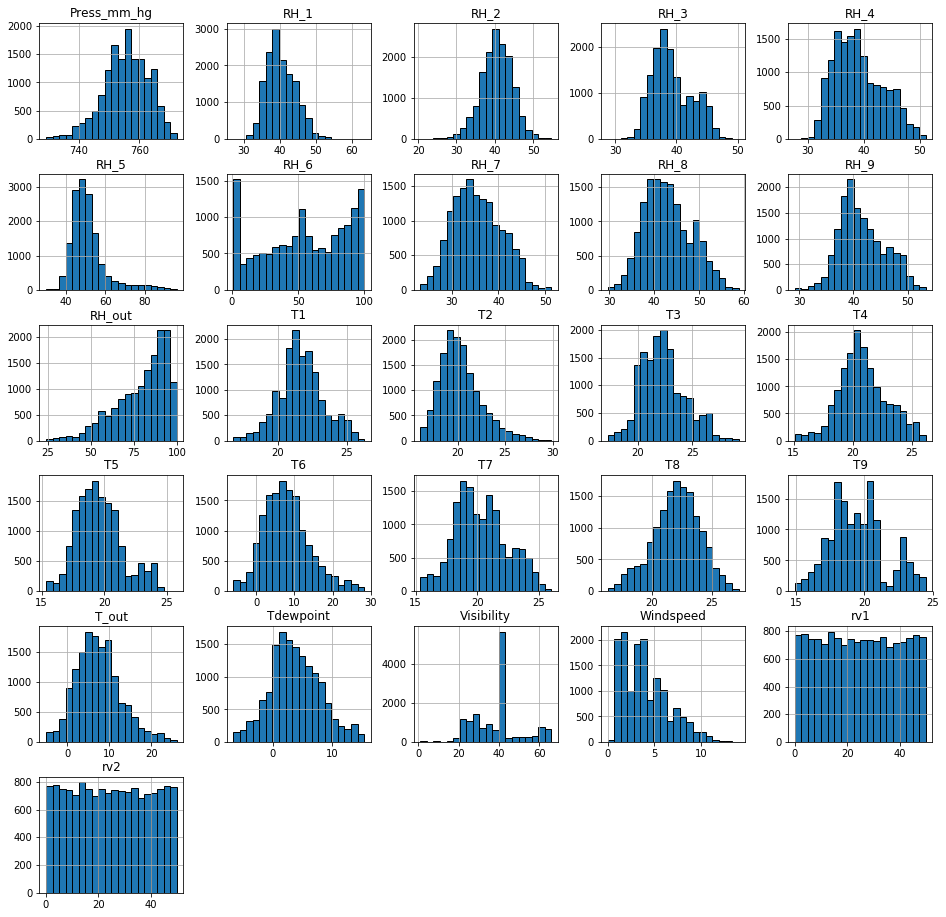

In [13]:
hists = input_vars.hist(figsize=(16, 16), bins=20,edgecolor='black')

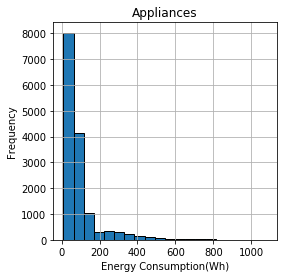

In [14]:
ax = output_var.hist(figsize=(4,4), bins=20,edgecolor='black')
for axe in ax.flatten():
    axe.set_xlabel("Energy Consumption(Wh)")
    axe.set_ylabel("Frequency")

It can be observed from Histograms that:-
* All humidity values except `RH_6` and `RH_out` follow a Normal distribution. That is, all the readings from sensors inside the home are from a Normal distribution.
* Similarly, all temperature readings follow a Normal distribution except for `T9`.
* Out of the remaining columns, we can see that `Visibility`, `Windspeed` and **`Appliances`** are skewed.
* The random variables rv1 and rv2 have more or less the same values for all the recordings.

The output variable Appliances has most values less than 200Wh, showing that high energy consumption cases are very low.

### Now that we know the ranges and distribution of the attributes we need to check for inter-attribute correlation.

## Correlation plots

In [15]:
from scipy.stats import spearmanr

In [16]:
labels = []
values = []
for col in input_vars.columns:
    labels.append(col)
    values.append(spearmanr(input_vars[col].values, output_var.values)[0])

In [17]:
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

In [18]:
corr_df = corr_df[(corr_df['corr_values']>=0.1) | (corr_df['corr_values']<=-0.1)]

In [19]:
rel_cols = corr_df.col_labels.tolist()

In [20]:
temp_df = train[rel_cols]

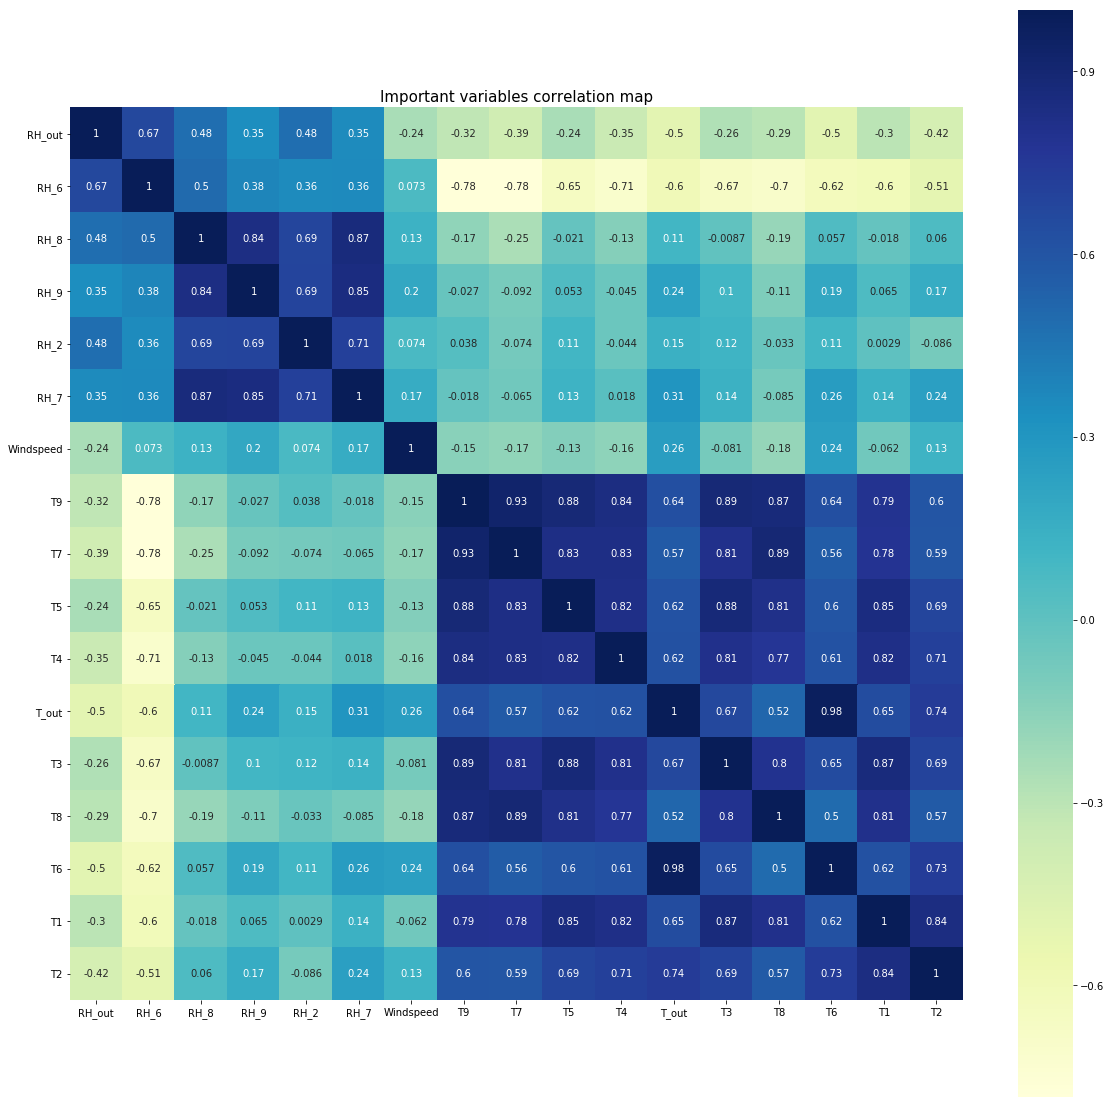

In [21]:
corrmat = temp_df.corr(method='spearman')
f,ax = plt.subplots(figsize=(20,20))

sns.heatmap(corrmat, vmax=1., square=True, cmap = 'YlGnBu', annot=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [22]:
input_vars.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'RH_1', 'RH_2',
       'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out',
       'Tdewpoint', 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'rv1',
       'rv2'],
      dtype='object')

In [23]:
rel_cols

['RH_out',
 'RH_6',
 'RH_8',
 'RH_9',
 'RH_2',
 'RH_7',
 'Windspeed',
 'T9',
 'T7',
 'T5',
 'T4',
 'T_out',
 'T3',
 'T8',
 'T6',
 'T1',
 'T2']

### This tells us all the relevant columns which have the most impact on the output variable (absolute correlation value >= 0.1)
* The random variables rv1 and rv2 are not important
* All the temperature variables from T1-T9 and T_out have high correlation with the target Appliances
* Most of the humidity columns have been left out 
* columns of Visibility, Tdewpoint, Press_mm_hg also have low correlation values 

* The inter-attribute correlation is very high(>0.9) b/w T6 and T_out
* A number of variables have high correlation with T9 (T3,T5,T7,T8), so it is clear that T9 is redundant
### T6 and T9 need to be removed 
### Although I've got the important variables based on correlation, its better to get a second opinion using a Tree based regressor (Extra Randomized Trees in this case).

In [24]:
train_X = train[input_vars.columns]
train_Y = train[output_var.columns]

In [25]:
train_X = train_X.drop(["T6", "T9"], axis=1)

In [26]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train_X, train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
          max_features=0.5, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
feature_names = train_X.columns.values
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

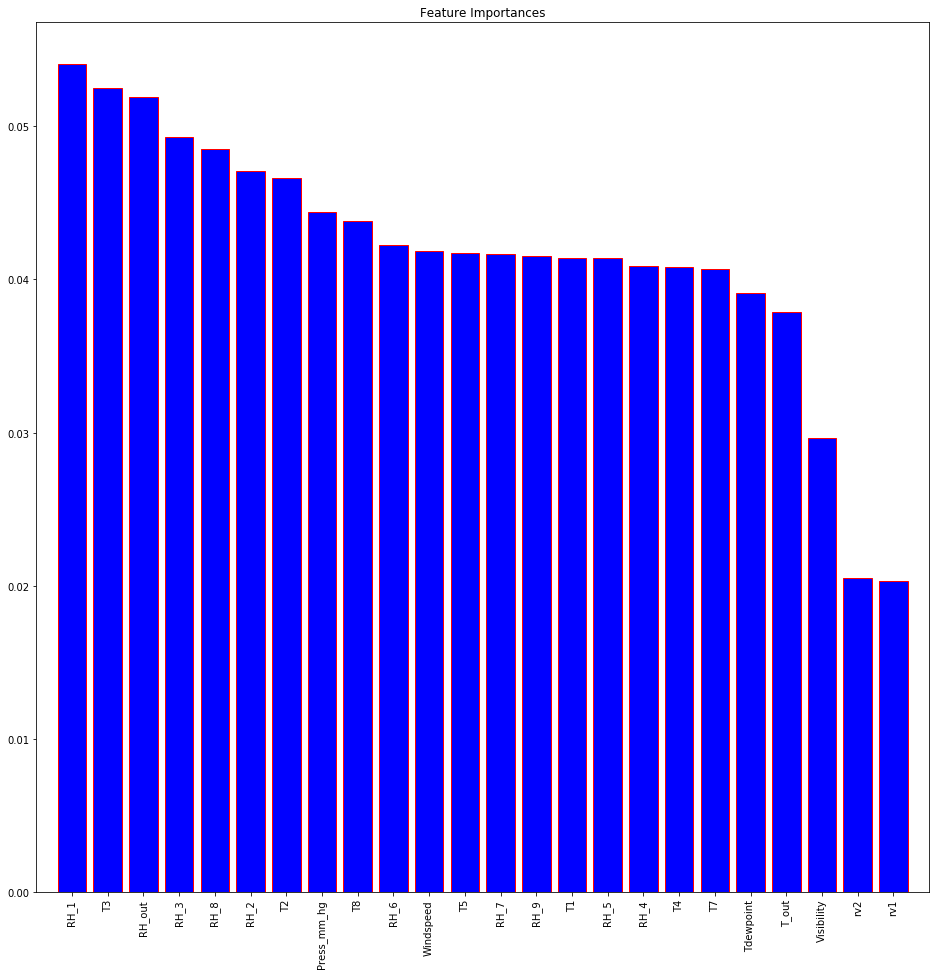

In [28]:
plt.figure(figsize=(16,16))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], color='b', align="center",edgecolor='red')
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [29]:
feature_names[indices]

array(['RH_1', 'T3', 'RH_out', 'RH_3', 'RH_8', 'RH_2', 'T2',
       'Press_mm_hg', 'T8', 'RH_6', 'Windspeed', 'T5', 'RH_7', 'RH_9',
       'T1', 'RH_5', 'RH_4', 'T4', 'T7', 'Tdewpoint', 'T_out',
       'Visibility', 'rv2', 'rv1'], dtype=object)

In [30]:
rel_cols

['RH_out',
 'RH_6',
 'RH_8',
 'RH_9',
 'RH_2',
 'RH_7',
 'Windspeed',
 'T9',
 'T7',
 'T5',
 'T4',
 'T_out',
 'T3',
 'T8',
 'T6',
 'T1',
 'T2']

* Comparing both lists we see that rv1, rv2 , Visibility are the least important of the lot. So removing them and keeping the rest.

In [31]:
train_X = train_X.drop(["rv1","rv2","Visibility"],axis=1)

In [32]:
test_X = test[input_vars.columns]
test_Y = test[output_var.columns]

In [33]:
test_X.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
17423,25.50,25.66,26.18,26.00,24.000000,23.460000,25.29,26.600000,24.10,49.766667,...,49.266667,48.137143,22.866667,13.10,54.5,746.650000,2.166667,40.000000,2.159049,2.159049
7289,20.00,18.39,20.60,18.70,18.463333,6.433333,18.29,20.166667,18.20,40.200000,...,45.860000,42.363333,6.600000,3.80,83.0,745.933333,8.833333,37.666667,16.145174,16.145174
9312,20.39,17.60,20.79,20.20,18.890000,3.126667,20.00,21.700000,19.73,39.260000,...,38.266667,38.560000,3.700000,0.50,80.0,764.800000,5.000000,23.000000,16.932733,16.932733
2406,18.70,17.89,19.60,17.70,17.235000,3.363333,17.29,17.345556,16.70,46.260000,...,49.187778,47.000000,4.600000,3.50,93.0,764.500000,2.000000,29.000000,0.879852,0.879852
11325,21.50,19.10,22.50,20.79,20.166667,8.860000,21.00,23.290000,20.29,40.500000,...,44.163333,40.966667,7.650000,4.55,81.0,751.850000,4.000000,40.000000,34.334162,34.334162


In [34]:
test_X.drop(["T6", "T9","rv1","rv2","Visibility"], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [35]:
test_X.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
17423,25.50,25.66,26.18,26.00,24.000000,25.29,26.600000,49.766667,47.280000,45.314,...,51.726667,6.696000,43.621429,49.266667,48.137143,22.866667,13.10,54.5,746.650000,2.166667
7289,20.00,18.39,20.60,18.70,18.463333,18.29,20.166667,40.200000,40.900000,38.700,...,44.726667,75.600000,34.933333,45.860000,42.363333,6.600000,3.80,83.0,745.933333,8.833333
9312,20.39,17.60,20.79,20.20,18.890000,20.00,21.700000,39.260000,43.963333,37.900,...,51.526667,66.930000,29.290000,38.266667,38.560000,3.700000,0.50,80.0,764.800000,5.000000
2406,18.70,17.89,19.60,17.70,17.235000,17.29,17.345556,46.260000,46.560000,44.590,...,52.817778,97.366667,42.900000,49.187778,47.000000,4.600000,3.50,93.0,764.500000,2.000000
11325,21.50,19.10,22.50,20.79,20.166667,21.00,23.290000,40.500000,44.200000,38.290,...,48.200000,42.800000,37.163333,44.163333,40.966667,7.650000,4.55,81.0,751.850000,4.000000


In [36]:
train_X.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
7798,20.20,17.823333,20.29,18.200000,17.926667,18.463333,21.390000,37.500000,39.300000,36.560000,...,47.633333,67.666667,29.390000,35.663333,35.500000,2.800000,0.766667,86.666667,744.000000,2.666667
2824,20.00,19.100000,20.79,17.790000,17.594444,17.083333,19.790000,42.700000,42.466667,44.500000,...,54.400000,99.560000,40.003333,53.450000,50.000000,4.633333,3.800000,94.333333,754.233333,4.000000
15355,20.60,17.500000,21.60,20.390000,19.290000,19.500000,21.566667,36.833333,40.223333,34.863333,...,47.993333,55.423333,30.200000,38.466667,37.633333,3.033333,2.200000,94.666667,750.666667,3.166667
14743,22.39,19.890000,24.89,22.290000,20.815000,21.500000,23.290000,39.090000,41.000000,37.045000,...,53.617500,55.400000,32.900000,46.400000,40.466667,7.266667,5.466667,88.333333,756.850000,4.000000
4854,20.20,18.390000,21.00,20.823333,17.878889,18.890000,20.790000,40.526667,41.363333,39.700000,...,49.988889,92.500000,37.230000,43.983333,42.433333,2.700000,2.000000,95.000000,736.300000,2.000000


In [37]:
test_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [38]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [39]:
# Import scaler
from sklearn.preprocessing import StandardScaler

# Scales the data to zero mean and unit variance
standard_scaler = StandardScaler()

In [40]:
train = train[list(train_X.columns.values) + target]

In [41]:
test = test[list(test_X.columns.values) + target]

In [42]:
train.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
7798,20.20,17.823333,20.29,18.200000,17.926667,18.463333,21.390000,37.500000,39.300000,36.560000,...,67.666667,29.390000,35.663333,35.500000,2.800000,0.766667,86.666667,744.000000,2.666667,70
2824,20.00,19.100000,20.79,17.790000,17.594444,17.083333,19.790000,42.700000,42.466667,44.500000,...,99.560000,40.003333,53.450000,50.000000,4.633333,3.800000,94.333333,754.233333,4.000000,40
15355,20.60,17.500000,21.60,20.390000,19.290000,19.500000,21.566667,36.833333,40.223333,34.863333,...,55.423333,30.200000,38.466667,37.633333,3.033333,2.200000,94.666667,750.666667,3.166667,70
14743,22.39,19.890000,24.89,22.290000,20.815000,21.500000,23.290000,39.090000,41.000000,37.045000,...,55.400000,32.900000,46.400000,40.466667,7.266667,5.466667,88.333333,756.850000,4.000000,60
4854,20.20,18.390000,21.00,20.823333,17.878889,18.890000,20.790000,40.526667,41.363333,39.700000,...,92.500000,37.230000,43.983333,42.433333,2.700000,2.000000,95.000000,736.300000,2.000000,110


In [43]:
# Create dummy dataframes to hold the scaled train and test data
train_scaled = pd.DataFrame(columns=train.columns, index=train.index)
test_scaled = pd.DataFrame(columns=test.columns, index=test.index)

In [44]:
train_scaled[train_scaled.columns] = standard_scaler.fit_transform(train)
test_scaled[test_scaled.columns] = standard_scaler.fit_transform(test)

In [45]:
# Prepare training and testing data
train_X = train_scaled.drop("Appliances", axis=1)
train_Y = train_scaled["Appliances"]

test_X = test_scaled.drop("Appliances", axis=1)
test_Y = test_scaled["Appliances"]

In [46]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

In [47]:
regressors = [
        Ridge, 
        Lasso,
        RandomForestRegressor,
        GradientBoostingRegressor,
        ExtraTreesRegressor,
        MLPRegressor
    ]

In [48]:
props = []

In [49]:
for reg in regressors:
        regs = reg(random_state=seed)
        regs.fit(train_X, train_Y)
        reg_props = {}
        reg_props["name"] = reg.__name__
        reg_props["train_score"] = regs.score(train_X, train_Y)
        reg_props["test_score"] = regs.score(test_X, test_Y)
        props.append(reg_props)

In [50]:
props

[{'name': 'Ridge',
  'train_score': 0.13696289560694963,
  'test_score': 0.12321902851290169},
 {'name': 'Lasso', 'train_score': 0.0, 'test_score': 0.0},
 {'name': 'RandomForestRegressor',
  'train_score': 0.9126404258422888,
  'test_score': 0.46755197980669533},
 {'name': 'GradientBoostingRegressor',
  'train_score': 0.33223805251775906,
  'test_score': 0.2411784460944197},
 {'name': 'ExtraTreesRegressor',
  'train_score': 1.0,
  'test_score': 0.5523093298559092},
 {'name': 'MLPRegressor',
  'train_score': 0.3298353039127615,
  'test_score': 0.2693214391961334}]

In [51]:
names = [prop["name"] for prop in props]
train_scores = [prop["train_score"] for prop in props]
test_scores = [prop["test_score"] for prop in props]

df = pd.DataFrame(index=names, 
                  data = {
                            "Training scores": train_scores,
                            "Testing scores": test_scores
                         }
                  )

In [52]:
df

,Training scores,Testing scores
Ridge,0.136963,0.123219
Lasso,0.000000,0.000000
RandomForestRegressor,0.912640,0.467552
GradientBoostingRegressor,0.332238,0.241178
ExtraTreesRegressor,1.000000,0.552309
MLPRegressor,0.329835,0.269321


* Least performing Regressor - Lasso Regressor
* Best performing Regressor - Extra Trees Regressor


Even though Extra Trees Regressor has a R2 score of 1.0 on traininig set, which might suggest overfitting but, it has the highest score on test set. Clearly, ExtraTreesRegressor is the best model out of given models.

## Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

# Initialize the best performing regressor
clf = ExtraTreesRegressor(random_state=seed)

# Define the parameter subset
param_grid = {
    "n_estimators": [10, 50, 100, 200, 250],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, 10, 50, 100, 200, 500]
}

# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation
grid_search = GridSearchCV(clf, param_grid, scoring="r2", cv=5, n_jobs=-1, verbose=2)
grid_search.fit(train_X, train_Y)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 21.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=79, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100, 200, 250], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=2)

In [54]:
grid_search.best_params_

{'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 250}

In [55]:
grid_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=50,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
          oob_score=False, random_state=79, verbose=0, warm_start=False)

In [56]:
grid_search.best_estimator_.score(train_X,train_Y)

1.0

In [57]:
grid_search.best_estimator_.score(test_X,test_Y)

0.6080073283757039

In [58]:
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

In [59]:
print("Top 5 most important features:-")
# Reverse the array to get important features at the beginning
for index in feature_indices[::-1][:5]:
    print(train_X.columns[index])
    
print("\nTop 5 least important features:-")
for index in feature_indices[:5]:
    print(test_X.columns[index])

Top 5 most important features:-
RH_1
RH_8
RH_out
T3
Press_mm_hg

Top 5 least important features:-
Windspeed
T4
T5
T1
T7


In [60]:
feature_names = train_X.columns.values
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

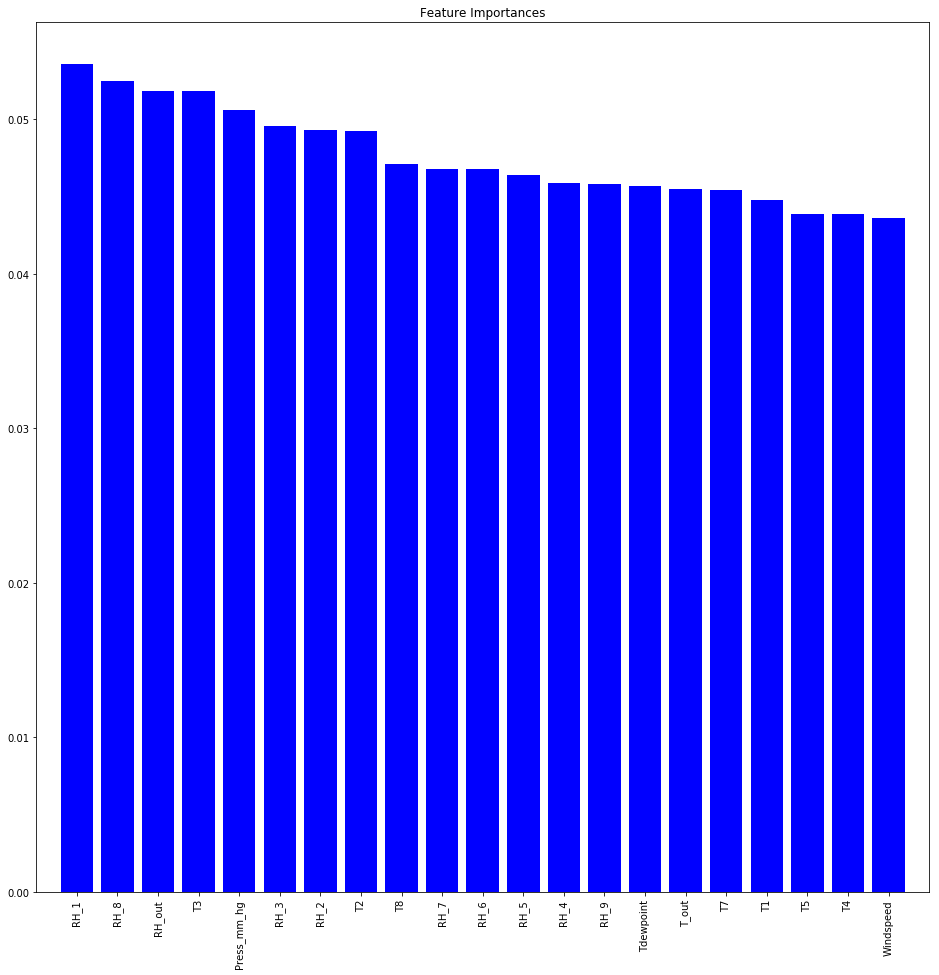

In [61]:
plt.figure(figsize=(16,16))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], color='b', align="center")
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [62]:
# Constructing data set from reduced feature space
train_X_reduced = train_X[train_X.columns[feature_indices[::-1][:5]]]
test_X_reduced = test_X[test_X.columns[feature_indices[::-1][:5]]]

In [63]:
from sklearn.base import clone

# Clone the best model
reg_best = clone(grid_search.best_estimator_)
# Fit the model on reduced data set 
reg_best.fit(train_X_reduced, train_Y)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=50,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
          oob_score=False, random_state=79, verbose=0, warm_start=False)

In [64]:
reg_best.score(test_X_reduced, test_Y)

0.5037652182558763

In [65]:
#Difference is about 10.5%
from sklearn.model_selection import cross_validate

In [66]:
clf = grid_search.best_estimator_

In [67]:
data_X = train_X.append(test_X)
data_Y = train_Y.append(test_Y)

In [68]:
scores = cross_validate(clf,data_X,data_Y, cv=5)

In [69]:
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [70]:
scores['test_score']

array([0.65657503, 0.67412217, 0.61592887, 0.64133702, 0.61577566])

In [71]:
scores['train_score']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([1., 1., 1., 1., 1.])